In [404]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

WHITELIST = """ !\\"#$%&\\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]`abcdefghijklmnopqrstuvwxyz{|}"""
BLACKLIST = """~_^"""

In [405]:
pdf_path = "resources/test-entries/pdfs/1987-page468.pdf"
tiff_path = "/home/midge/Downloads/1987-page468.tiff"
config=f"--psm 6 -c tessedit_char_whitelist={WHITELIST} -c tessedit_char_blacklist={BLACKLIST}"

In [406]:
images = convert_from_path(
    pdf_path,
    grayscale=True,
    fmt='tiff',
    dpi=500,
)

images[0].save(
    tiff_path,
    save_all=True,
    append_images=images[1:],
    compression='tiff_lzw'
)

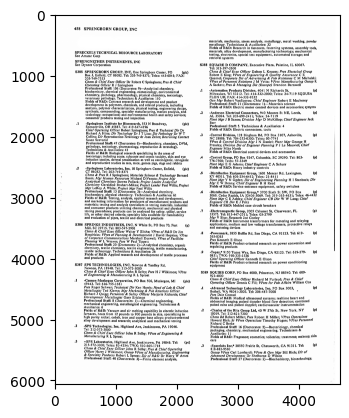

In [407]:
image = cv2.imread(tiff_path, cv2.IMREAD_GRAYSCALE)

sharpen_kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])
image = cv2.filter2D(image, -1, sharpen_kernel)

plt.imshow(image, cmap="gray")
plt.show()

In [408]:
height, width = image.shape
middle = (width // 2)

left_col = image[:, 75:middle]
right_col = image[:, middle:-75]

cv2.imwrite("/home/midge/Downloads/left_half.tiff", left_col)
cv2.imwrite("/home/midge/Downloads/right_half.tiff", right_col)

True

In [409]:
img = cv2.imread("/home/midge/Downloads/left_half.tiff")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [410]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

cv2.imwrite("/home/midge/Downloads/left_half_otsu.tiff", thresh)

True

In [411]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (200, 20))
dilation = cv2.dilate(thresh, rect_kernel, iterations=1)

cv2.imwrite("/home/midge/Downloads/left_dilation.tiff", dilation)

True

In [412]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [413]:
img2 = img.copy()

cv2.drawContours(img2, contours, -1, (0, 255, 0), 3)

cv2.imwrite("/home/midge/Downloads/left_half_contours.tiff", img2)

True

In [414]:
image_bb = cv2.imread("/home/midge/Downloads/left_half_contours.tiff")

text = pytesseract.image_to_string(image_bb, lang="eng", config=config)
print(text.replace("|", "1"))

458 SPRINGBORN GROUP, INC
SPRECKELS TECHNICAL RESOURCE LABORATORY
See Amstar Corp
SPRENGNETHER INSTRUMENTS, INC
Sce Dyneer Corporation
S385 SPRINGBORN GROUP, INC, One Springborn Center, PO (gic)
Box J, Enfield, CT 06082. Tel: 203-749-8371; Telex: 443-6041; FAX:
203-749-7533
Chmn & Chief Exec Officer Dr Robert C Springborn; Pres & Chief
Operating Officer R J Springborn
Professional Staff: 106 (Doctorates: 9)—Analytical chemistry,
biochemistry, chemical engineering, ecotoxicology, environmental
chemistry, pathology, pharmacology, physical chemistry, toxicology,
veterinary pathology. Technicians & Auxiliaries: 110
Fields of R&D: Contract research and development and product
development in polymers, chemicals, and related products, including
analysis, polymer characterization, physical testing, engineering design,
synthesis, compounding, specialty manufacturing, market analysis, and-
toxicology; occupational and environmental health and safety services;
consumer producls testing and inspec